In [1]:
from fastai.tabular import *
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import os
import sys
import glob
import pprint
from sklearn.utils import shuffle
p = pprint.PrettyPrinter(indent=4, width=30)
pretty = p.pprint

print('libraries loaded')

libraries loaded


In [2]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-15s-Layer2.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)

dataPath = 'CICDataSet-TOR/Scenario-B'

relevant libraries uploaded
b'VOIP'               1509
b'VIDEO-STREAMING'     598
b'FILE-TRANSFER'       480
b'CHAT'                243
b'BROWSING'            227
b'EMAIL'               186
b'P2P'                  71
b'AUDIO-STREAMING'      46
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [3]:
df_data

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,10345300.0,10345257.0,10345174.0,60.0,52.0,5871778.0,5870638.0,517262.850000,470235.181818,4.253139,...,1.022685e+06,4092108.0,4981436.0,5870764.0,1.257700e+06,3435979.0,4653308.5,5870638.0,1.721564e+06,b'CHAT'
1,14966353.0,14966200.0,14966053.0,7.0,0.0,635321.0,635242.0,10502.596491,5615.779737,273.413302,...,2.134758e+04,-1.0,0.0,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,b'VIDEO-STREAMING'
2,272867.0,233627.0,272820.0,20303.0,19353.0,213324.0,253467.0,116813.500000,136410.000000,21.988734,...,9.018174e+04,-1.0,0.0,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,b'CHAT'
3,14999391.0,14998887.0,14999391.0,0.0,0.0,149034.0,146556.0,9062.771601,4758.690038,320.613017,...,9.995782e+03,-1.0,0.0,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,b'VIDEO-STREAMING'
4,7190597.0,7189947.0,7190597.0,116.0,492.0,6555090.0,6594711.0,898743.375000,898824.625000,2.503269,...,1.582350e+06,7051063.0,7051063.0,7051063.0,0.000000e+00,6555090.0,6555090.0,6555090.0,0.000000e+00,b'CHAT'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,14976412.0,14951944.0,14976224.0,0.0,169.0,116860.0,116865.0,42237.129944,32416.069264,54.619224,...,2.221594e+04,-1.0,0.0,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,b'VOIP'
3356,14985734.0,14985523.0,14985547.0,264.0,247.0,92345.0,92048.0,45273.483384,33903.952489,51.715852,...,2.154300e+04,-1.0,0.0,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,b'VOIP'
3357,14962345.0,14949820.0,14962345.0,558.0,136.0,92602.0,85917.0,45029.578313,34005.329545,51.729859,...,2.151883e+04,-1.0,0.0,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,b'VOIP'
3358,14956327.0,14950876.0,14956327.0,376.0,160.0,95703.0,101039.0,43716.011696,34069.082005,52.352426,...,2.139296e+04,-1.0,0.0,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,b'VOIP'


In [4]:
# total Tor samples
df_data['class1'].value_counts()
df_data.dtypes

duration              float64
total_fiat            float64
total_biat            float64
min_fiat              float64
min_biat              float64
max_fiat              float64
max_biat              float64
mean_fiat             float64
mean_biat             float64
flowPktsPerSecond     float64
flowBytesPerSecond    float64
min_flowiat           float64
max_flowiat           float64
mean_flowiat          float64
std_flowiat           float64
min_active            float64
mean_active           float64
max_active            float64
std_active            float64
min_idle              float64
mean_idle             float64
max_idle              float64
std_idle              float64
class1                 object
dtype: object

In [10]:
df_dep_var = 'class1'
#df_cat_names = ['duration', 'total_fiat', 'total_biat']
cont_names = list(set(df_data.columns) - set([df_dep_var]))

In [11]:
cont_names

['total_biat',
 'min_idle',
 'max_flowiat',
 'mean_idle',
 'max_active',
 'max_fiat',
 'mean_fiat',
 'max_biat',
 'min_flowiat',
 'mean_flowiat',
 'std_active',
 'min_biat',
 'std_flowiat',
 'min_active',
 'min_fiat',
 'mean_active',
 'max_idle',
 'std_idle',
 'duration',
 'mean_biat',
 'flowBytesPerSecond',
 'total_fiat',
 'flowPktsPerSecond']

In [6]:
procs = [FillMissing, Categorify, Normalize]
sss = StratifiedShuffleSplit(n_splits = 2, test_size=0.5, random_state=0)
print(sss)

StratifiedShuffleSplit(n_splits=2, random_state=0, test_size=0.5,
            train_size=None)


epoch,train_loss,valid_loss,accuracy,time
0,0.720718,0.680326,0.007468,00:00
1,0.674276,0.631263,0.004113,00:00
2,0.606932,0.636398,0.113718,00:00
3,0.532973,0.449568,0.098431,00:00
4,0.465488,0.521532,0.013799,00:00
5,0.407174,0.447811,0.000000,00:00
6,0.363691,0.370444,0.000000,00:00
7,0.333964,0.402378,0.000000,00:00
8,0.313967,0.375437,0.000000,00:00
9,0.301398,0.391595,0.000000,00:00


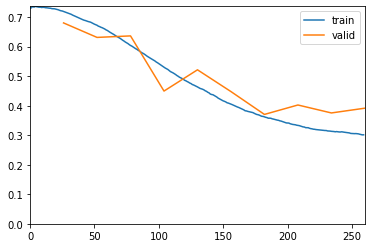

epoch,train_loss,valid_loss,accuracy,time
0,0.726284,0.714424,0.046374,00:00
1,0.685392,0.641872,0.003842,00:00
2,0.618944,0.613587,0.072186,00:00
3,0.542451,0.498992,0.077841,00:00
4,0.467953,0.399570,0.042641,00:00
5,0.405097,0.404292,0.001596,00:00
6,0.359013,0.336372,0.001596,00:00
7,0.328554,0.346254,0.000000,00:00
8,0.308468,0.358011,0.001596,00:00
9,0.296538,0.360833,0.001596,00:00


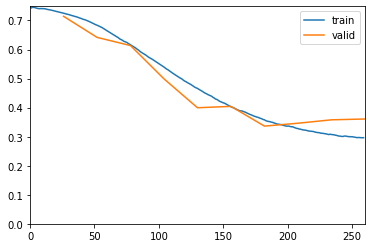

In [19]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

In [20]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.3608328700065613: accuracy: 0.16%


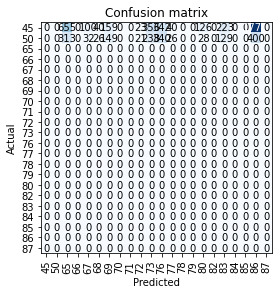

In [25]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [21]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-15s-Layer2-15.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)


relevant libraries uploaded
b'VOIP'               237
b'VIDEO-STREAMING'     83
b'FILE-TRANSFER'       76
b'BROWSING'            37
b'CHAT'                30
b'EMAIL'               27
b'P2P'                 10
b'AUDIO-STREAMING'      4
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [22]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,0.716506,0.710394,0.000000,00:00
1,0.711502,0.710715,0.028680,00:00
2,0.702235,0.709528,0.023268,00:00
3,0.691975,0.702624,0.009921,00:00
4,0.678390,0.699320,0.003247,00:00
5,0.668483,0.704211,0.005772,00:00
6,0.657948,0.706548,0.005772,00:00
7,0.648343,0.708619,0.005772,00:00
8,0.639800,0.712392,0.005772,00:00
9,0.632933,0.718554,0.005772,00:00


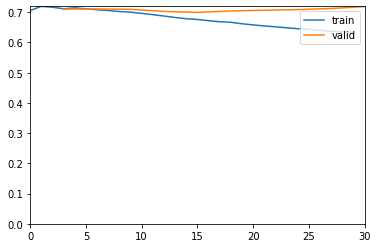

epoch,train_loss,valid_loss,accuracy,time
0,0.760774,0.725020,0.000000,00:00
1,0.755104,0.722923,0.000000,00:00
2,0.742287,0.717620,0.000000,00:00
3,0.729964,0.708797,0.000000,00:00
4,0.714924,0.698830,0.000000,00:00
5,0.700926,0.692105,0.000000,00:00
6,0.689147,0.688000,0.000000,00:00
7,0.677625,0.685875,0.000000,00:00
8,0.667761,0.684396,0.000000,00:00
9,0.659232,0.689207,0.000000,00:00


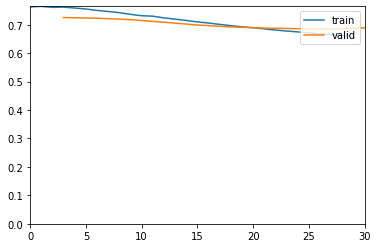

In [23]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

In [24]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.6892073154449463: accuracy: 0.00%


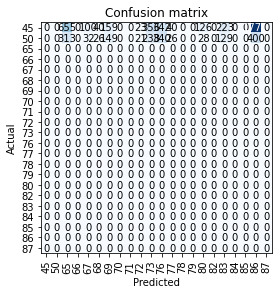

In [26]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [28]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-15s-Layer2-85.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)


relevant libraries uploaded
b'VOIP'               1272
b'VIDEO-STREAMING'     515
b'FILE-TRANSFER'       404
b'CHAT'                213
b'BROWSING'            190
b'EMAIL'               159
b'P2P'                  61
b'AUDIO-STREAMING'      42
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [29]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,0.715610,0.686591,0.156704,00:00
1,0.671351,0.643435,0.126496,00:00
2,0.613572,0.607776,0.102559,00:00
3,0.555624,0.602497,0.107716,00:00
4,0.502118,0.543594,0.083142,00:00
5,0.450631,0.489821,0.102368,00:00
6,0.406670,0.470490,0.102400,00:00
7,0.372497,0.451340,0.065031,00:00
8,0.349517,0.441484,0.042526,00:00
9,0.332701,0.454694,0.054367,00:00


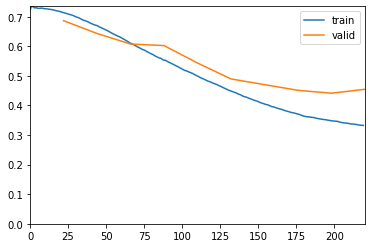

epoch,train_loss,valid_loss,accuracy,time
0,0.699488,0.687541,0.000000,00:00
1,0.665493,0.656538,0.119525,00:00
2,0.611547,0.585642,0.125000,00:00
3,0.549006,0.463757,0.088044,00:00
4,0.490324,0.443265,0.109371,00:00
5,0.437226,0.446850,0.088076,00:00
6,0.391115,0.436255,0.036510,00:00
7,0.358612,0.356260,0.033422,00:00
8,0.335503,0.370199,0.020595,00:00
9,0.319047,0.383180,0.021931,00:00


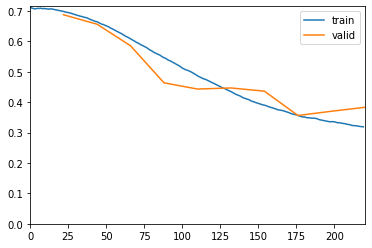

In [30]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

In [31]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.38318032026290894: accuracy: 2.19%


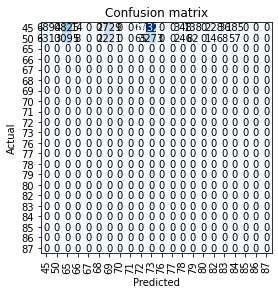

In [32]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [33]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-30s-Layer2.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)


relevant libraries uploaded
b'VOIP'               758
b'VIDEO-STREAMING'    345
b'FILE-TRANSFER'      246
b'CHAT'               147
b'BROWSING'           133
b'EMAIL'              104
b'P2P'                 38
b'AUDIO-STREAMING'     32
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [34]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,0.725824,0.729691,0.014261,00:00
1,0.694192,0.730327,0.004989,00:00
2,0.654359,0.705255,0.030337,00:00
3,0.613870,0.705704,0.001310,00:00
4,0.576684,0.705480,0.001361,00:00
5,0.543075,0.685836,0.001361,00:00
6,0.513639,0.703866,0.003225,00:00
7,0.490051,0.652577,0.006601,00:00
8,0.470441,0.649729,0.023080,00:00
9,0.456212,0.642092,0.024743,00:00


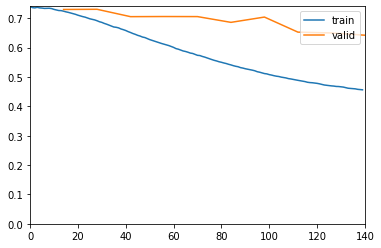

epoch,train_loss,valid_loss,accuracy,time
0,0.718207,0.683101,0.028976,00:00
1,0.686676,0.645267,0.000000,00:00
2,0.648536,0.629927,0.000000,00:00
3,0.607620,0.598057,0.000000,00:00
4,0.570629,0.610541,0.000000,00:00
5,0.539324,0.637162,0.000000,00:00
6,0.510133,0.531158,0.000000,00:00
7,0.485760,0.523449,0.000000,00:00
8,0.466018,0.518539,0.000000,00:00
9,0.449295,0.517777,0.000000,00:00


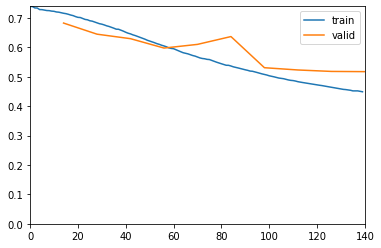

In [35]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

In [36]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.5177773833274841: accuracy: 0.00%


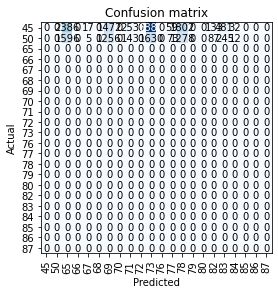

In [37]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [38]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-30s-Layer2-15.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)


relevant libraries uploaded
b'VOIP'               105
b'VIDEO-STREAMING'     63
b'FILE-TRANSFER'       37
b'CHAT'                28
b'EMAIL'               15
b'BROWSING'            14
b'AUDIO-STREAMING'      5
b'P2P'                  4
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [40]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,0.733662,0.696435,0.000000,00:00
1,0.732301,0.695312,0.000000,00:00
2,0.728313,0.693540,0.000000,00:00
3,0.720385,0.690551,0.000000,00:00
4,0.711332,0.689321,0.003008,00:00
5,0.701908,0.688211,0.006016,00:00
6,0.693680,0.687189,0.006016,00:00
7,0.686655,0.686514,0.006016,00:00
8,0.679902,0.686637,0.006016,00:00
9,0.674901,0.686759,0.006016,00:00


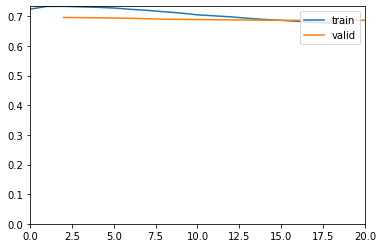

epoch,train_loss,valid_loss,accuracy,time
0,0.711760,0.691939,0.000000,00:00
1,0.712744,0.689206,0.000000,00:00
2,0.707969,0.685159,0.000000,00:00
3,0.700616,0.680029,0.000000,00:00
4,0.692311,0.674554,0.000000,00:00
5,0.685350,0.669178,0.000000,00:00
6,0.678580,0.664431,0.000000,00:00
7,0.672082,0.660679,0.000000,00:00
8,0.667477,0.657751,0.000000,00:00
9,0.662532,0.655722,0.000000,00:00


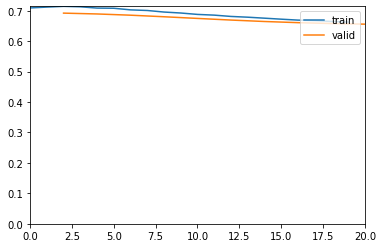

In [41]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

In [42]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.6557215452194214: accuracy: 0.00%


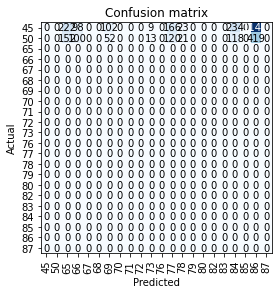

In [43]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [44]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-30s-Layer2-85.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)


relevant libraries uploaded
b'VOIP'               653
b'VIDEO-STREAMING'    282
b'FILE-TRANSFER'      209
b'CHAT'               119
b'BROWSING'           119
b'EMAIL'               89
b'P2P'                 34
b'AUDIO-STREAMING'     27
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [45]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,0.700095,0.682839,0.116247,00:00
1,0.684299,0.658696,0.131142,00:00
2,0.658089,0.620860,0.075421,00:00
3,0.625402,0.584593,0.017446,00:00
4,0.595750,0.559180,0.005934,00:00
5,0.567910,0.582850,0.006705,00:00
6,0.543617,0.594014,0.011809,00:00
7,0.523239,0.575739,0.015962,00:00
8,0.507356,0.573012,0.015428,00:00
9,0.494194,0.575652,0.015784,00:00


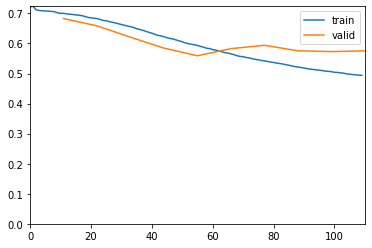

epoch,train_loss,valid_loss,accuracy,time
0,0.730576,0.715385,0.040173,00:00
1,0.715653,0.705291,0.059993,00:00
2,0.690599,0.672405,0.021362,00:00
3,0.656649,0.635739,0.026703,00:00
4,0.620970,0.611776,0.060764,00:00
5,0.589477,0.686006,0.401080,00:00
6,0.560492,0.572839,0.067766,00:00
7,0.536133,0.602106,0.053465,00:00
8,0.517377,0.601059,0.064325,00:00
9,0.502291,0.604562,0.063257,00:00


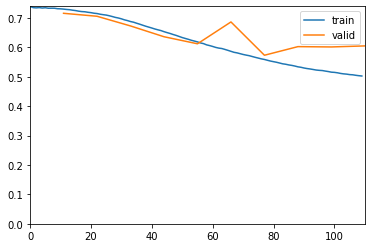

In [46]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

In [47]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.6045621633529663: accuracy: 6.33%


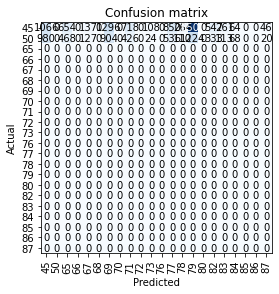

In [48]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [49]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-60s-Layer2.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)


relevant libraries uploaded
b'VOIP'               381
b'VIDEO-STREAMING'    177
b'FILE-TRANSFER'      125
b'CHAT'                84
b'BROWSING'            73
b'EMAIL'               54
b'AUDIO-STREAMING'     22
b'P2P'                 20
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [50]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,0.714792,0.713885,0.000000,00:00
1,0.699717,0.709711,0.000000,00:00
2,0.679183,0.689036,0.000000,00:00
3,0.657024,0.675493,0.000000,00:00
4,0.634658,0.674576,0.000000,00:00
5,0.614563,0.682230,0.000000,00:00
6,0.596880,0.696537,0.000000,00:00
7,0.581935,0.708241,0.000000,00:00
8,0.570117,0.713320,0.000000,00:00
9,0.559434,0.723075,0.000000,00:00


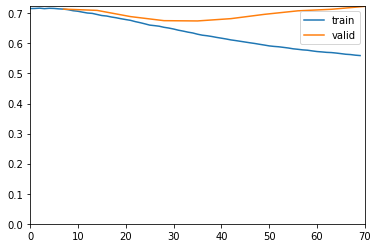

epoch,train_loss,valid_loss,accuracy,time
0,0.715312,0.696437,0.001263,00:00
1,0.701312,0.693445,0.000000,00:00
2,0.683853,0.672153,0.000000,00:00
3,0.660714,0.651784,0.000000,00:00
4,0.638613,0.662995,0.000874,00:02
5,0.617260,0.661201,0.003497,00:00
6,0.597579,0.689817,0.003497,00:00
7,0.580966,0.739659,0.003497,00:00
8,0.567632,0.758310,0.003497,00:00
9,0.557092,0.771626,0.003497,00:00


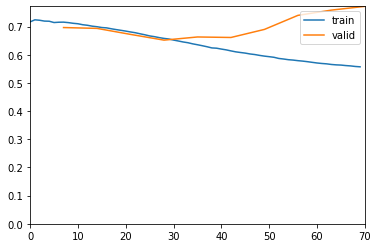

In [51]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

In [54]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.6773143410682678: accuracy: 0.43%


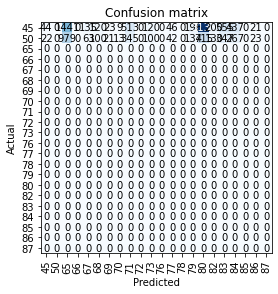

In [55]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [58]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-60s-Layer2-15.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)


relevant libraries uploaded
b'VOIP'               50
b'VIDEO-STREAMING'    19
b'BROWSING'           15
b'FILE-TRANSFER'      14
b'CHAT'               11
b'EMAIL'               7
b'AUDIO-STREAMING'     3
b'P2P'                 1
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [61]:
df_data

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,59990105.0,59990029.0,59964416.0,0.0,0.0,210165.0,208601.0,6.234674e+03,8.468354e+03,278.462590,...,1.358003e+04,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,b'FILE-TRANSFER'
1,59964705.0,59879987.0,59925440.0,0.0,0.0,349456.0,349209.0,5.810206e+03,7.852895e+03,299.159314,...,1.314781e+04,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,b'FILE-TRANSFER'
2,32362503.0,32362503.0,32362136.0,0.0,0.0,15128637.0,15128408.0,2.171980e+04,1.141924e+04,133.673221,...,2.335672e+05,2885151.0,1.580000e+07,28619351.0,1.820000e+07,2080569.0,8.604488e+06,15128408.0,9.226215e+06,b'AUDIO-STREAMING'
3,29637594.0,29636549.0,29637594.0,29636549.0,29637594.0,29636549.0,29637594.0,2.960000e+07,2.960000e+07,0.134964,...,1.710000e+07,29636591.0,2.960000e+07,29636591.0,0.000000e+00,29636549.0,2.960000e+07,29636549.0,0.000000e+00,b'AUDIO-STREAMING'
4,6153793.0,6153793.0,6152777.0,6153793.0,6152777.0,6153793.0,6152777.0,6.153793e+06,6.152777e+06,0.650006,...,3.552014e+06,6153737.0,6.153737e+06,6153737.0,0.000000e+00,6152777.0,6.152777e+06,6152777.0,0.000000e+00,b'AUDIO-STREAMING'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,59978002.0,59978002.0,59977714.0,0.0,0.0,14266113.0,14304335.0,4.346232e+04,2.307723e+04,66.374335,...,3.255822e+05,1605913.0,9.574805e+06,17189788.0,4.976143e+06,1039823.0,7.191396e+06,14266113.0,4.678613e+06,b'VIDEO-STREAMING'
116,39005789.0,39004631.0,39005789.0,1.0,0.0,19043328.0,19043324.0,1.781033e+05,9.607337e+04,16.074537,...,8.823084e+05,7948182.0,1.280000e+07,19043328.0,5.664308e+06,7496854.0,1.160000e+07,19043067.0,6.436156e+06,b'VIDEO-STREAMING'
117,59999443.0,59999443.0,59999203.0,0.0,0.0,9696463.0,9696404.0,2.223849e+04,1.188574e+04,129.134532,...,1.741080e+05,8178834.0,1.150000e+07,16194118.0,2.927630e+06,2143405.0,6.208250e+06,9696256.0,3.087087e+06,b'VIDEO-STREAMING'
118,52454484.0,52454484.0,52415985.0,623.0,704.0,18077682.0,18077819.0,2.017480e+06,1.807448e+06,1.086656,...,3.231882e+06,1399544.0,7.302913e+06,18397756.0,6.956533e+06,1077460.0,6.934669e+06,18077571.0,6.897008e+06,b'VIDEO-STREAMING'


In [59]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

In [60]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [56]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.6773143410682678: accuracy: 0.43%


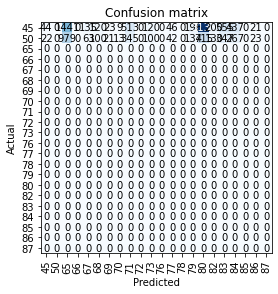

In [57]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [3]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-60s-Layer2-85.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)


relevant libraries uploaded
b'VOIP'               325
b'VIDEO-STREAMING'    147
b'FILE-TRANSFER'      107
b'CHAT'                71
b'BROWSING'            64
b'EMAIL'               44
b'AUDIO-STREAMING'     20
b'P2P'                 17
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [4]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,0.715801,0.739383,0.000000,00:00
1,0.706107,0.752800,0.000000,00:00
2,0.691255,0.757141,0.002398,00:00
3,0.671871,0.764562,0.005482,00:00
4,0.652851,0.750677,0.006852,00:00
5,0.635747,0.757861,0.009936,00:00
6,0.618893,0.744531,0.012334,00:00
7,0.605309,0.731633,0.009936,00:00
8,0.593953,0.733552,0.011992,00:00
9,0.585360,0.735190,0.011992,00:00


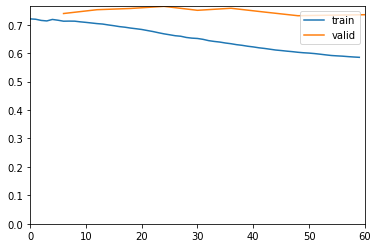

epoch,train_loss,valid_loss,accuracy,time
0,0.736821,0.720026,0.000000,00:00
1,0.726456,0.729825,0.009022,00:00
2,0.709294,0.726893,0.007880,00:00
3,0.689546,0.712623,0.006167,00:00
4,0.669567,0.695829,0.001370,00:00
5,0.650732,0.694726,0.000000,00:00
6,0.632919,0.702171,0.001370,00:00
7,0.617340,0.711315,0.001370,00:00
8,0.604712,0.723174,0.001142,00:00
9,0.594033,0.721325,0.001142,00:00


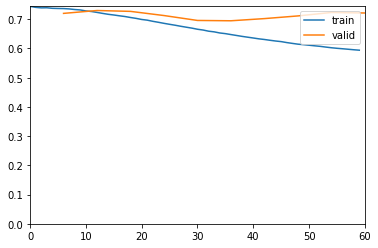

In [7]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

In [8]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.7213249206542969: accuracy: 0.11%


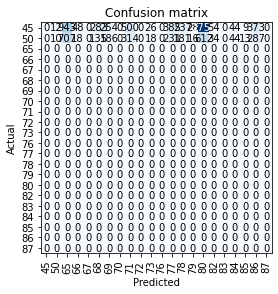

In [9]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [10]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-120s-layer2.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)


relevant libraries uploaded
b'VOIP'               193
b'VIDEO-STREAMING'     90
b'FILE-TRANSFER'       63
b'CHAT'                45
b'BROWSING'            41
b'EMAIL'               28
b'AUDIO-STREAMING'     16
b'P2P'                 10
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [11]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,0.711283,0.727598,0.000000,00:00
1,0.704903,0.732097,0.000000,00:00
2,0.698662,0.735105,0.000000,00:00
3,0.688052,0.727585,0.005425,00:00
4,0.676479,0.720008,0.003367,00:00
5,0.665778,0.715268,0.003367,00:00
6,0.655641,0.718216,0.010101,00:00
7,0.648108,0.717562,0.007295,00:00
8,0.640732,0.719520,0.008979,00:00
9,0.635300,0.722780,0.005612,00:00


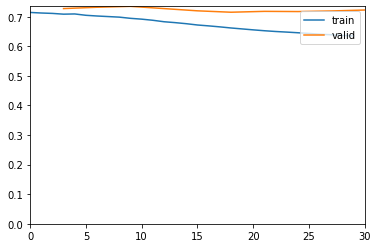

epoch,train_loss,valid_loss,accuracy,time
0,0.720440,0.719572,0.093528,00:00
1,0.719354,0.730017,0.251964,00:00
2,0.709558,0.734216,0.575196,00:00
3,0.697041,0.733654,0.305088,00:00
4,0.684993,0.730226,0.272540,00:00
5,0.672828,0.727595,0.260756,00:00
6,0.661820,0.720207,0.252525,00:00
7,0.652225,0.713097,0.239805,00:00
8,0.643213,0.718303,0.230453,00:00
9,0.637138,0.730413,0.218668,00:00


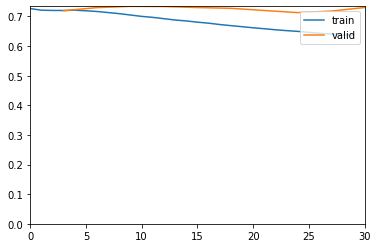

In [12]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

In [13]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.7304129004478455: accuracy: 21.87%


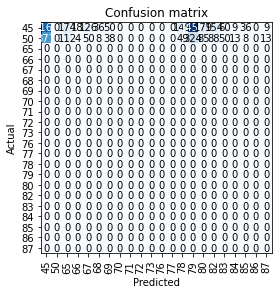

In [14]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [15]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-120s-layer2-15.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)


relevant libraries uploaded
b'VOIP'               32
b'VIDEO-STREAMING'    13
b'FILE-TRANSFER'      13
b'EMAIL'               5
b'BROWSING'            5
b'CHAT'                3
b'AUDIO-STREAMING'     2
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [16]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

In [17]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

You can deactivate this warning by passing `no_check=True`.


/home/minglee/miniconda3/lib/python3.7/site-packages/fastai/basic_data.py:248: UserWarning: Your training dataloader is empty, you have only 36 items in your training set.
                 Your batch size is 64, you should lower it.
  Your batch size is {self.train_dl.batch_size}, you should lower it.""")


AssertionError: Your training dataloader is empty, can't train a model.
        Use a smaller batch size (batch size=64 for 36 elements).

In [18]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.6848055124282837: accuracy: 0.00%


In [19]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-120s-layer2-85.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)


relevant libraries uploaded
b'VOIP'               161
b'VIDEO-STREAMING'     77
b'FILE-TRANSFER'       50
b'CHAT'                42
b'BROWSING'            36
b'EMAIL'               23
b'AUDIO-STREAMING'     14
b'P2P'                 10
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [20]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,0.730020,0.721294,0.000000,00:00
1,0.724620,0.724930,0.000000,00:00
2,0.717530,0.723905,0.000000,00:00
3,0.706856,0.722719,0.000000,00:00
4,0.696317,0.721561,0.000000,00:00
5,0.685104,0.722738,0.000000,00:00
6,0.674581,0.727850,0.000000,00:00
7,0.666006,0.733418,0.000000,00:00
8,0.659186,0.741269,0.000000,00:00
9,0.652641,0.753102,0.000000,00:00


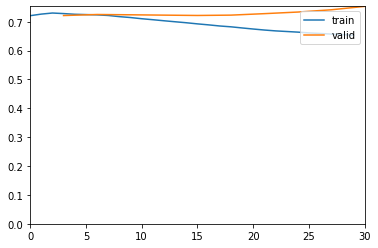

epoch,train_loss,valid_loss,accuracy,time
0,0.717599,0.726988,0.000000,00:00
1,0.710882,0.726800,0.000000,00:00
2,0.700947,0.725630,0.000000,00:00
3,0.689937,0.721799,0.000000,00:00
4,0.678881,0.719645,0.000000,00:00
5,0.669322,0.718980,0.000000,00:00
6,0.660037,0.717510,0.000000,00:00
7,0.651560,0.716541,0.000000,00:00
8,0.644206,0.716066,0.000000,00:00
9,0.638177,0.723231,0.000000,00:00


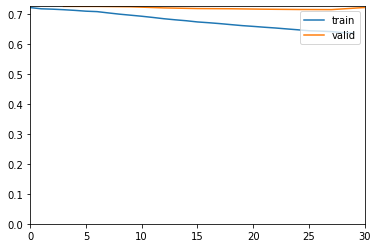

In [21]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

In [22]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.7232314944267273: accuracy: 0.00%
